# Obligatorisk innlevering 1 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi kjøp av bilforsikring ved kjøp av bil

In [36]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, RepeatedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

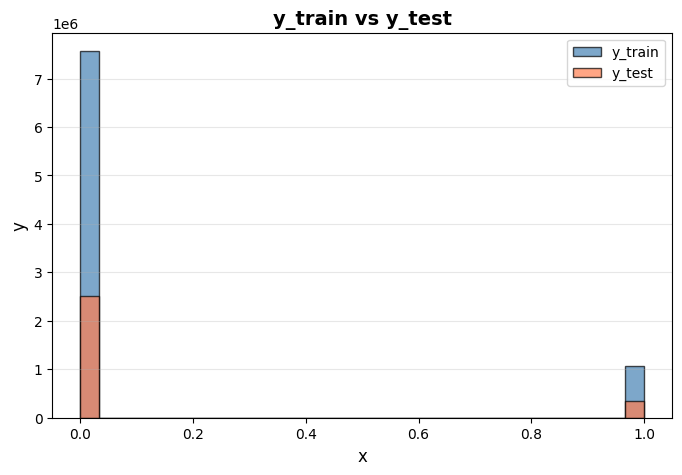

In [5]:
#TODO: visualiser y_train og y_test i et histogram
#Lager Historgramet
plt.figure(figsize=(8, 5))

#Histogram for y_train
plt.hist(y_train, bins=30, color='steelblue', alpha=0.7, label='y_train', edgecolor='black')

#Histogram for y_test
plt.hist(y_test, bins=30, color='coral', alpha=0.7, label='y_test', edgecolor='black')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.title('y_train vs y_test', fontsize=14, fontweight='bold')

plt.grid(axis='y', alpha=0.3)

plt.legend()
plt.show()

**Svar:**

*< Dette er et klassifiseringsproblem fordi vi har bare 2 verdier i x aksen som kan bare være 0 eller 1>*

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


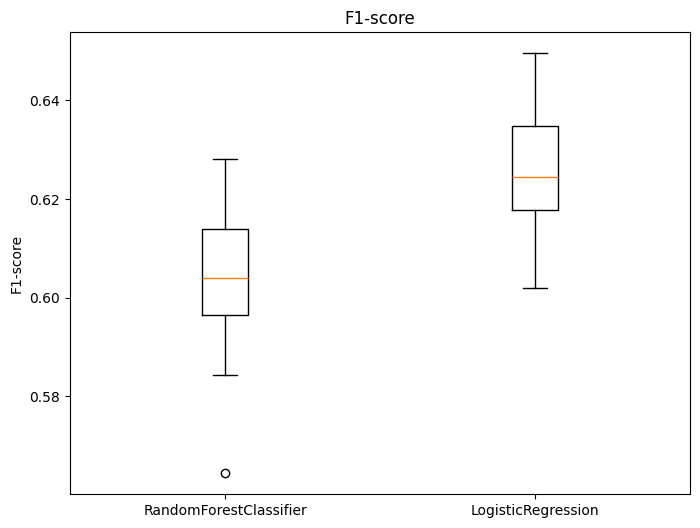


To-sidig t-test mellom model1 og model2:
t-statistikk = -12.650, p-verdi = 0.000

Gjennomsnitt og F1-score accuracy:
RandomForestClassifier: F1 = 0.604, Accuracy = 0.556
LogisticRegression: F1 = 0.626, Accuracy = 0.585


In [44]:


#Ai generet for å være ærlig jeg haade en versjon på github som kjørte uten all dette men så begynte jeg å få string to float errors når jeg prøvde det å kjøre det igjen senere
categorical_cols = ['Vehicle_Age', 'Vehicle_Damage']
numeric_cols = ['Age', 'Driving_License', 'Region_Code',
                'Previously_Insured', 'Annual_Premium',
                'Policy_Sales_Channel', 'Vintage']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)
X_processed = preprocessor.fit_transform(X)
#end


#Definer F1 scorer med Male som positiv klasse
f1_scorer = make_scorer(f1_score, pos_label='Male')

#Modeller
model1 = RandomForestClassifier(random_state=42)
model2 = LogisticRegression(random_state=42, max_iter=1000)

#repitert kfold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

#setter en limit på hvor mye av dataen blir lest hele settet er for mye
X_small = X_processed[:10000]
y_small = y[:10000]

#f1
f1_model1 = cross_val_score(model1, X_small, y_small, cv=rkf, scoring=f1_scorer)
f1_model2 = cross_val_score(model2, X_small, y_small, cv=rkf, scoring=f1_scorer)

#accuracy
acc_model1 = cross_val_score(model1, X_small, y_small, cv=rkf, scoring='accuracy')
acc_model2 = cross_val_score(model2, X_small, y_small, cv=rkf, scoring='accuracy')

#boxplot
plt.figure(figsize=(8,6))
plt.boxplot([f1_model1, f1_model2], tick_labels=['RandomForestClassifier', 'LogisticRegression'])
plt.ylabel('F1-score')
plt.title('F1-score')
plt.show()

#p_value er to stidig som stanader vi sjekker for forskjell i begge retninger
t_stat, p_value = ttest_rel(f1_model1, f1_model2)

print("\nTo-sidig t-test mellom model1 og model2:")
print(f"t-statistikk = {t_stat:.3f}, p-verdi = {p_value:.3f}")

#Printer Gjennomsnitt
print("\nGjennomsnitt og F1-score accuracy:")
print(f"RandomForestClassifier: F1 = {f1_model1.mean():.3f}, Accuracy = {acc_model1.mean():.3f}")
print(f"LogisticRegression: F1 = {f1_model2.mean():.3f}, Accuracy = {acc_model2.mean():.3f}")

**Svar:**

*< Jeg valgte et default hyperparameter for modellene siden et hyperparametersøk ville ta lengre tid og blir ikke spurt i denne oppgaven siden du ønsker bare å sammenligne modellene og ikke optimere dem, Vi kan see etter å har kjørt koden på bare 10 000 rader Grunnen for dette er for å kjøre hele dete store datasette er urealistik (jeg prøve og etter en time med kjøring ga jeg opp) så jeg har satt en limit på 10 000 rader resultat burde være nærme nok, så er Randomforest F1 score 0.604 og Accuracy score på 0,556 mens Logistic Regression F1 score 0.626 og Accuracy score på 0,585, modellene gjør det bedre en tilfeldig gjetting (50/50). Logistic Regression gjør det bedre en RandomForestClassifier man kan see det på p-verdi også at den er 0 som innebærere at nullhypotesen er sann, kansje vis jeg kjørte hele datasettet og optimaliserte modellen så kunne resultatet være bedre>*

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

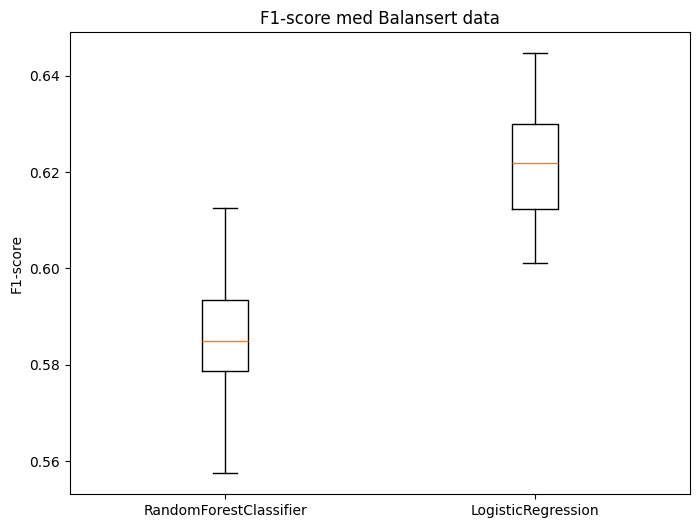


To-sidig t-test mellom model1 og model2:
t-statistikk = -27.726, p-verdi = 0.000

Gjennomsnitt for F1-score og accuracy:
Random Forest: F1 = 0.585, Accuracy = 0.551
Logistic Regression: F1 = 0.621, Accuracy = 0.585


In [40]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_small)

#Definer F1 scorer med Male som positiv klasse
f1_scorer = make_scorer(f1_score, pos_label='Male')

#Modeller
model1 = RandomForestClassifier(random_state=42)
model2 = LogisticRegression(random_state=42, max_iter=1000)

#repitert kfold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

#SMOTE
pipeline1 = Pipeline([('smote', SMOTE(random_state=42)), ('rf', model1)])
pipeline2 = Pipeline([('smote', SMOTE(random_state=42)), ('lr', model2)])

#f1
f1_model1 = cross_val_score(pipeline1, X_small, y_small, cv=rkf, scoring=f1_scorer)
f1_model2 = cross_val_score(pipeline2, X_small, y_small, cv=rkf, scoring=f1_scorer)

#accuracy
acc_model1 = cross_val_score(pipeline1, X_small, y_small, cv=rkf, scoring='accuracy')
acc_model2 = cross_val_score(pipeline2, X_small, y_small, cv=rkf, scoring='accuracy')

#boxplot
plt.figure(figsize=(8,6))
plt.boxplot([f1_model1, f1_model2], tick_labels=['RandomForestClassifier', 'LogisticRegression'])
plt.ylabel('F1-score')
plt.title('F1-score med Balansert data')
plt.show()

#p_value er to stidig som stanader vi sjekker for forskjell i begge retninger
t_stat, p_value = ttest_rel(f1_model1, f1_model2)

print("\nTo-sidig t-test mellom model1 og model2:")
print(f"t-statistikk = {t_stat:.3f}, p-verdi = {p_value:.3f}")

#Printer Gjennomsnitt
print("\nGjennomsnitt for F1-score og accuracy:")
print(f"RandomForestClassifier: F1 = {f1_model1.mean():.3f}, Accuracy = {acc_model1.mean():.3f}")
print(f"Logistic Regression: F1 = {f1_model2.mean():.3f}, Accuracy = {acc_model2.mean():.3f}")

**Svar:**

*< I Oppgave 2.2 så fikk vi verdiene Randomforest F1 score 0.604 og Accuracy score på 0,556 mens Logistic Regression F1 score 0.626 og Accuracy score på 0,585 mens her nå vi trener modellene med et balansert datasett så kan vi se at RandomForestClassifier går ned i verdi fra oppgave 2.2 mens Logisticregression går litt ned i F1 score men forholder den samme accuracy scoren som indikerer at modellen er bedre en RandomForestClassifier>*

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [10]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene

#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [11]:
#TODO: Gjør kjønnsbasert analyse på testdataene

Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i besvarelsen

In [12]:
#!pip freeze > requirements.txt